# Analysis of Snow Fraction and Snowmelt Partitioning sensitivity

Comparison of the snowmelt partitioning sensitivity to snow fraction, ect.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [2]:
dat = pd.read_hdf('./budyko_working.hdf','df')

In [3]:
len(dat.loc[dat.Sf>1,:])

0

In [ ]:
dat = dat.loc[dat.pvalue < 0.05,:]
dat = dat.loc[dat.rsquared > 0.45,:]

In [ ]:
X = dat.slope.dropna().astype(float)
y = dat.elev.dropna().astype(float)

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
ax.plot(X.slope,y,'ok', alpha = 0.05)
ax.plot(X.slope,results.fittedvalues,'r')
ax.set_xlim(-0.1,0.05);
ax.set_ylim(0,4000);
ax.set_ylabel('Elevation [m]')
ax.set_xlabel('Slope');
plt.savefig('./figures/elev_vs_slope.png',bbox_inches='tight')

print results.summary()

In [ ]:
dat2 = dat.filter(regex='depth')
dat2.l1l2depth = dat2.l1_depth+dat2.l2_depth

In [ ]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
ax.plot(dat.slope,dat2.l2_depth,'ok',alpha = 0.01)
ax.set_xlim(-.1,0.05)
ax.set_ylabel('L2 Soil Depth [m]')
ax.set_xlabel('Slope')
plt.savefig('./figures/soil_depth_vs_slope.png',bbox_inches='tight')

In [ ]:
print(list(dat.columns))

In [ ]:
X = dat.slope.dropna().astype(float)
y = dat.Sf.dropna().astype(float)

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
ax.plot(X.slope,y,'ok', alpha = 0.05)
ax.plot(X.slope,results.fittedvalues,'r')
ax.set_xlim(-0.1,0.05);
ax.set_ylim(0,1);
ax.set_ylabel('Snow Fraction')
ax.set_xlabel('Slope');
plt.savefig('./figures/Sf_vs_slope.png',bbox_inches='tight')

print results.summary()

In [ ]:
len(dat.loc[dat.Sf>1,:])/float(len(dat))

                            OLS Regression Results                            
Dep. Variable:            meanpeakswe   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2184.
Date:                Fri, 20 Feb 2015   Prob (F-statistic):               0.00
Time:                        15:41:16   Log-Likelihood:            -1.9426e+06
No. Observations:              294511   AIC:                         3.885e+06
Df Residuals:                  294509   BIC:                         3.885e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         96.9633      0.327    296.081      0.0

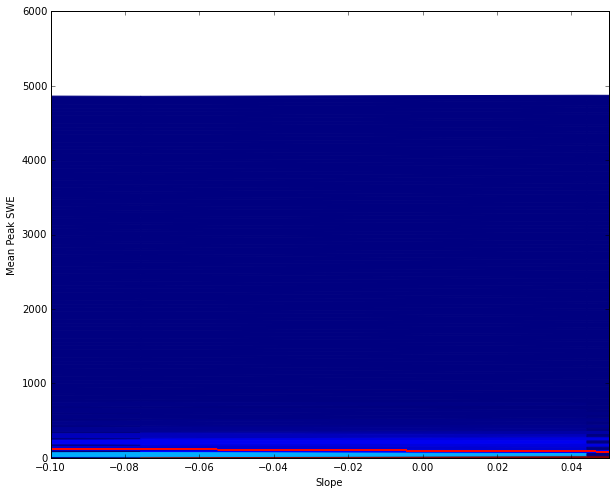

In [9]:
data2 = dat.dropna(subset=['slope','meanpeakswe']).astype(float)

X = data2.slope
y = data2.meanpeakswe

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
ax.hexbin(X.slope,y)
ax.plot(X.slope,results.fittedvalues,'r')
ax.set_xlim(-0.1,0.05);
ax.set_ylim(0,6000);
ax.set_ylabel('Mean Peak SWE')
ax.set_xlabel('Slope');
#plt.savefig('./figures/elev_vs_slope.png',bbox_inches='tight')

print results.summary()

In [ ]:
dat = pd.read_hdf('./budyko_working.hdf','df')

                            OLS Regression Results                            
Dep. Variable:                w_flux3   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     336.9
Date:                Thu, 26 Feb 2015   Prob (F-statistic):           1.16e-74
Time:                        12:26:16   Log-Likelihood:                -32896.
No. Observations:               21284   AIC:                         6.580e+04
Df Residuals:                   21282   BIC:                         6.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.5034      0.040     61.956      0.0

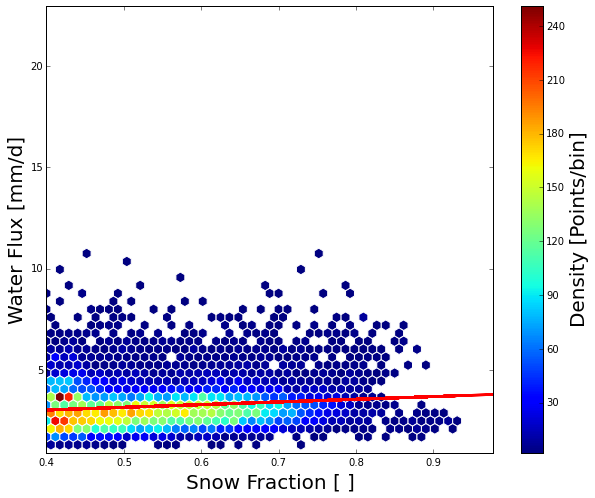

In [4]:
#dat.loc[np.isinf(dat.meanablslope)==True,:]=np.NaN
data2 = dat.dropna(subset=['Sf','w_flux3']).astype(float)

X = data2.loc[data2.Sf >= 0.4,:].Sf
y = data2.loc[data2.Sf >= 0.4,:].w_flux3

X = sm.add_constant(X)

results = sm.OLS(y,X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
p1 = ax.hexbin(data2.loc[data2.Sf >= 0.4,:].Sf,data2.loc[data2.Sf >= 0.4,:].w_flux3,mincnt=2,gridsize = 50, edgecolors='white')
cb = plt.colorbar(p1)
ax.plot(data2.loc[data2.Sf >= 0.4,:].Sf,results.fittedvalues,'r',lw=2.5)
#ax.set_xlim(-0.1,0.05);
#ax.set_ylim(0,6000);
ax.set_ylabel('Water Flux [mm/d]',fontsize = 20)
ax.set_xlabel('Snow Fraction [ ]',fontsize = 20);
cb.set_label('Density [Points/bin]', fontsize = 20)
plt.savefig('./figures/Sf40_vs_water_flux3.png',bbox_inches='tight')

print results.summary()

                            OLS Regression Results                            
Dep. Variable:                w_flux3   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                 6.397e+04
Date:                Thu, 26 Feb 2015   Prob (F-statistic):               0.00
Time:                        12:27:11   Log-Likelihood:            -5.6135e+05
No. Observations:              309667   AIC:                         1.123e+06
Df Residuals:                  309665   BIC:                         1.123e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.6788      0.004   1187.101      0.0

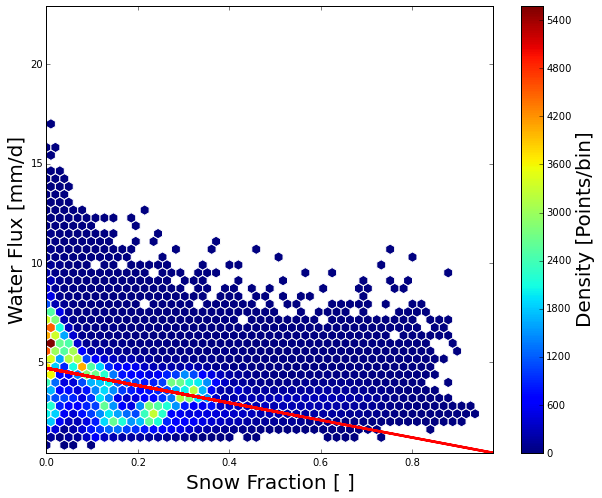

In [5]:
#dat.loc[np.isinf(dat.meanablslope)==True,:]=np.NaN
data2 = dat.dropna(subset=['Sf','w_flux','w_flux2','w_flux3']).astype(float)

X = data2.Sf
y = data2.w_flux3

X = sm.add_constant(X)

results = sm.OLS(y,X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
p1 = ax.hexbin(data2.Sf,data2.w_flux3,mincnt=2,gridsize = 50, edgecolors='white')
cb = plt.colorbar(p1)
ax.plot(data2.Sf,results.fittedvalues,'r',lw=2.5)
#ax.set_xlim(-0.1,0.05);
#ax.set_ylim(0,6000);
ax.set_ylabel('Water Flux [mm/d]',fontsize = 20)
ax.set_xlabel('Snow Fraction [ ]',fontsize = 20);
cb.set_label('Density [Points/bin]', fontsize = 20)
plt.savefig('./figures/Sf_vs_water_flux3.png',bbox_inches='tight')

print results.summary()

In [11]:
dat = dat.loc[dat.pvalue < 0.05,:]
dat = dat.loc[dat.rsquared > 0.45,:]

In [31]:
data2 = dat.dropna(subset=['Sf','w_flux','w_flux2','w_flux3']).astype(float)
Sfthresh = 0.2
# fit all the models
X = data2.loc[data2.Sf > Sfthresh,:].Sf
y = data2.loc[data2.Sf > Sfthresh,:].w_flux
X = sm.add_constant(X)
m1 = sm.OLS(y,X).fit()

X = data2.Sf
y = data2.w_flux
X = sm.add_constant(X)
m2 = sm.OLS(y,X).fit()

X = data2.loc[data2.Sf > Sfthresh,:].Sf
y = data2.loc[data2.Sf > Sfthresh,:].w_flux2
X = sm.add_constant(X)
m3 = sm.OLS(y,X).fit()

X = data2.Sf
y = data2.w_flux2
X = sm.add_constant(X)
m4 = sm.OLS(y,X).fit()

X = data2.loc[data2.Sf > Sfthresh,:].Sf
y = data2.loc[data2.Sf > Sfthresh,:].w_flux3
X = sm.add_constant(X)
m5 = sm.OLS(y,X).fit()

X = data2.Sf
y = data2.w_flux3
X = sm.add_constant(X)
m6 = sm.OLS(y,X).fit()

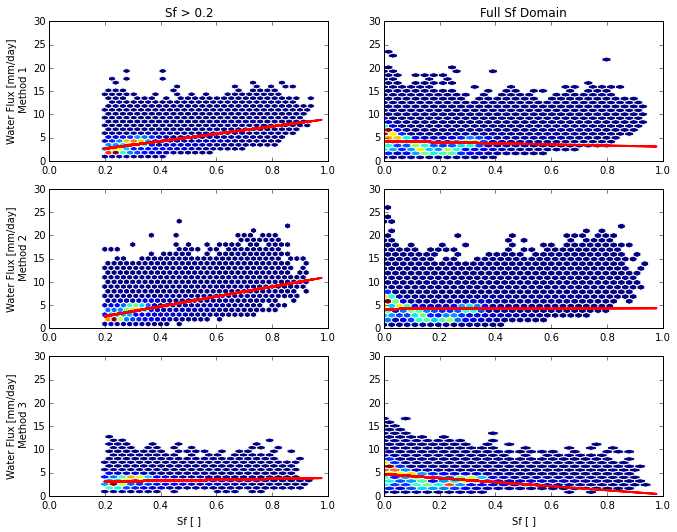

In [38]:
# now plot

fig = plt.figure(figsize=(11,8.5))

ax1 = fig.add_subplot(3,2,1)
ax1.hexbin(data2.loc[data2.Sf > Sfthresh,:].Sf,data2.loc[data2.Sf > Sfthresh,:].w_flux, gridsize=30, edgecolor='white',mincnt=2)
ax1.plot(data2.loc[data2.Sf > Sfthresh,:].Sf,m1.fittedvalues,'-r',lw=2)
ax1.set_ylabel('Water Flux [mm/day] \n Method 1')
ax1.set_title('Sf > '+str(Sfthresh))
ax1.set_ylim(0,30)
ax1.set_xlim(0,1)

ax2 = fig.add_subplot(3,2,2)
ax2.hexbin(data2.Sf,data2.w_flux, gridsize=30, edgecolor='white',mincnt=2)
ax2.plot(data2.Sf,m2.fittedvalues,'-r',lw=2)
ax2.set_title('Full Sf Domain')
ax2.set_ylim(0,30)
ax2.set_xlim(0,1)

ax3 = fig.add_subplot(3,2,3)
ax3.hexbin(data2.loc[data2.Sf > Sfthresh,:].Sf,data2.loc[data2.Sf > Sfthresh,:].w_flux2, gridsize=35, edgecolor='white',mincnt=2)
ax3.plot(data2.loc[data2.Sf > Sfthresh,:].Sf,m3.fittedvalues,'-r',lw=2)
ax3.set_ylabel('Water Flux [mm/day] \n Method 2')
ax3.set_ylim(0,30)
ax3.set_xlim(0,1)

ax4 = fig.add_subplot(3,2,4)
ax4.hexbin(data2.Sf,data2.w_flux2, gridsize=35, edgecolor='white',mincnt=2)
ax4.plot(data2.Sf,m4.fittedvalues,'-r',lw=2)
ax4.set_ylim(0,30)
ax4.set_xlim(0,1)

ax5 = fig.add_subplot(3,2,5)
ax5.hexbin(data2.loc[data2.Sf > Sfthresh,:].Sf,data2.loc[data2.Sf > Sfthresh,:].w_flux3, gridsize=25, edgecolor='white',mincnt=2)
ax5.plot(data2.loc[data2.Sf > Sfthresh,:].Sf,m5.fittedvalues,'-r',lw=2)
ax5.set_ylabel('Water Flux [mm/day] \n Method 3')
ax5.set_xlabel('Sf [ ]')
ax5.set_ylim(0,30)
ax5.set_xlim(0,1)

ax6 = fig.add_subplot(3,2,6)
ax6.hexbin(data2.Sf,data2.w_flux3, gridsize=25, edgecolor='white',mincnt=2)
ax6.plot(data2.Sf,m6.fittedvalues,'-r',lw=2)
ax6.set_xlabel('Sf [ ]')
ax6.set_ylim(0,30)
ax6.set_xlim(0,1)

#plt.savefig('./figures/water_flux_Sf_methods.png', dpi=600)

In [40]:
print m1.summary()
print
print m3.summary()
print
print m5.summary()

                            OLS Regression Results                            
Dep. Variable:                 w_flux   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                 5.163e+04
Date:                Thu, 26 Feb 2015   Prob (F-statistic):               0.00
Time:                        14:13:02   Log-Likelihood:            -2.0761e+05
No. Observations:              115827   AIC:                         4.152e+05
Df Residuals:                  115825   BIC:                         4.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0807      0.012     87.291      0.0

                            OLS Regression Results                            
Dep. Variable:           meanablslope   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.574e+05
Date:                Thu, 26 Feb 2015   Prob (F-statistic):               0.00
Time:                        14:36:21   Log-Likelihood:            -4.8216e+05
No. Observations:              214886   AIC:                         9.643e+05
Df Residuals:                  214884   BIC:                         9.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7197      0.009    185.075      0.0

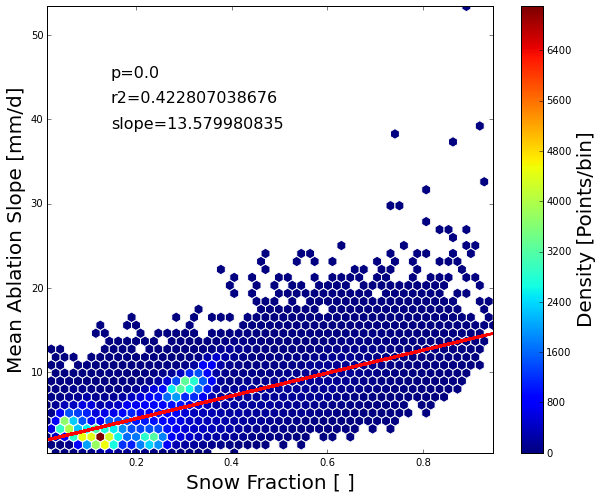

In [50]:
data2 = dat.dropna(subset=['Sf','meanablslope']).astype(float)

X = data2.Sf
y = data2.meanablslope

X = sm.add_constant(X)

results = sm.OLS(y,X).fit()

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
p1 = ax.hexbin(data2.Sf,data2.meanablslope,mincnt=1,gridsize = 50, edgecolors='white')
cb = plt.colorbar(p1)
ax.plot(data2.Sf,results.fittedvalues,'r',lw=2.5)
#ax.set_xlim(-0.1,0.05);
#ax.set_ylim(0,6000);
ax.set_ylabel('Mean Ablation Slope [mm/d]',fontsize = 20)
ax.set_xlabel('Snow Fraction [ ]',fontsize = 20);
cb.set_label('Density [Points/bin]', fontsize = 20)
annx = 0.15
ax.text(annx,45,'p='+str(results.f_pvalue), fontsize = 16)
ax.text(annx,42,'r2='+str(results.rsquared), fontsize = 16)
ax.text(annx,39,'slope='+str(results.params.Sf), fontsize = 16)

plt.savefig('./figures/Sf_vs_ablationrate.png',bbox_inches='tight', dpi=600)

print results.summary()

In [48]:
results.params.Sf

13.579980834974844

In [13]:
from sklearn import cluster

In [23]:
data3 = np.array([np.reshape(data2.meanablslope,data2.Sf])

In [24]:
data3

array([[ 5.19960221,  5.37213592,  5.7670703 , ...,  8.11695484,
         8.40641074,  5.62449018],
       [ 0.32919765,  0.31487932,  0.36339756, ...,  0.47970122,
         0.43234232,  0.38515719]])

In [96]:
data2 = dat.dropna(subset=['Sf','meanablslope']).astype(float)
init = np.array([[2,0.1],[2,0.25],[9,0.3],[8,0.55]])
k_means = cluster.KMeans(n_clusters=4, init=init, tol = 0.1,max_iter=4000)
k_means.fit(data2[['meanablslope','Sf']].as_matrix())

/Users/barnhatb/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:731: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)


KMeans(copy_x=True,
    init=array([[ 2.  ,  0.1 ],
       [ 2.  ,  0.25],
       [ 9.  ,  0.3 ],
       [ 8.  ,  0.55]]),
    max_iter=4000, n_clusters=4, n_init=10, n_jobs=1,
    precompute_distances=True, random_state=None, tol=0.1, verbose=0)

In [97]:
np.unique(k_means.labels_)

array([0, 1, 2, 3], dtype=int32)

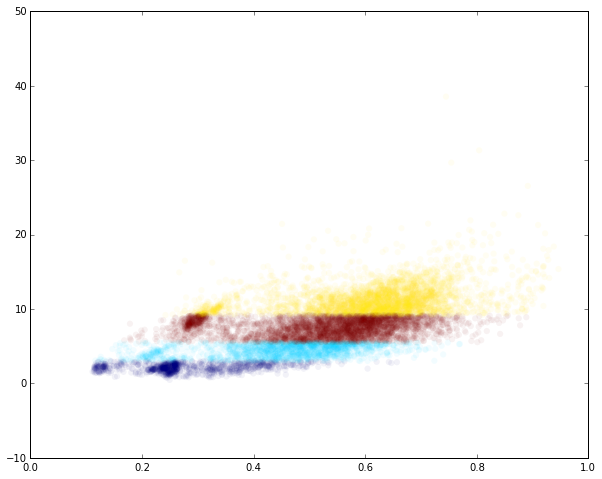

In [98]:
plt.figure(figsize=[10,8])
plt.scatter(data2.Sf,data2.meanablslope,s=40,c=k_means.labels_, edgecolor='none', alpha=0.05)

In [65]:
data2[['meanablslope','Sf']].as_matrix()

array([[ 5.19960221,  0.32919765],
       [ 5.37213592,  0.31487932],
       [ 5.7670703 ,  0.36339756],
       ..., 
       [ 8.11695484,  0.47970122],
       [ 8.40641074,  0.43234232],
       [ 5.62449018,  0.38515719]])

In [83]:
from sklearn import datasets

iris = datasets.load_iris()

In [85]:
k_means = cluster.KMeans(n_clusters=3, init='random', tol = 0.00000001,max_iter=4000)

In [86]:
k_means.fit(iris.data)

KMeans(copy_x=True, init='random', max_iter=4000, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=1e-08,
    verbose=0)

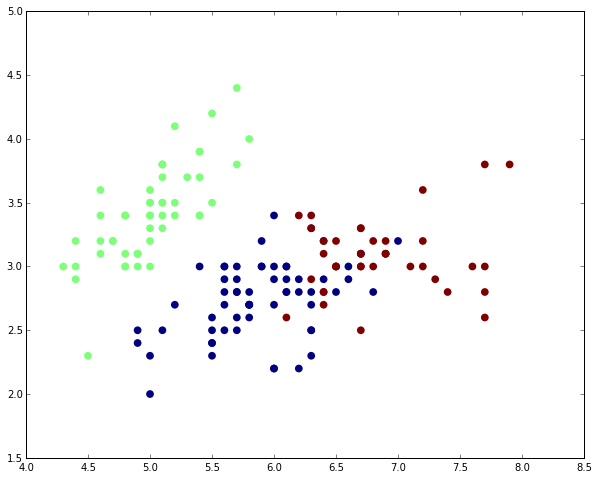

In [93]:
plt.figure(figsize=[10,8])
plt.scatter(iris.data[:,0],iris.data[:,1],s=60,c=k_means.labels_, edgecolor='none')

In [90]:
iris.data[:,]

array([ 3.5,  3. ,  3.2,  3.1,  3.6,  3.9,  3.4,  3.4,  2.9,  3.1,  3.7,
        3.4,  3. ,  3. ,  4. ,  4.4,  3.9,  3.5,  3.8,  3.8,  3.4,  3.7,
        3.6,  3.3,  3.4,  3. ,  3.4,  3.5,  3.4,  3.2,  3.1,  3.4,  4.1,
        4.2,  3.1,  3.2,  3.5,  3.1,  3. ,  3.4,  3.5,  2.3,  3.2,  3.5,
        3.8,  3. ,  3.8,  3.2,  3.7,  3.3,  3.2,  3.2,  3.1,  2.3,  2.8,
        2.8,  3.3,  2.4,  2.9,  2.7,  2. ,  3. ,  2.2,  2.9,  2.9,  3.1,
        3. ,  2.7,  2.2,  2.5,  3.2,  2.8,  2.5,  2.8,  2.9,  3. ,  2.8,
        3. ,  2.9,  2.6,  2.4,  2.4,  2.7,  2.7,  3. ,  3.4,  3.1,  2.3,
        3. ,  2.5,  2.6,  3. ,  2.6,  2.3,  2.7,  3. ,  2.9,  2.9,  2.5,
        2.8,  3.3,  2.7,  3. ,  2.9,  3. ,  3. ,  2.5,  2.9,  2.5,  3.6,
        3.2,  2.7,  3. ,  2.5,  2.8,  3.2,  3. ,  3.8,  2.6,  2.2,  3.2,
        2.8,  2.8,  2.7,  3.3,  3.2,  2.8,  3. ,  2.8,  3. ,  2.8,  3.8,
        2.8,  2.8,  2.6,  3. ,  3.4,  3.1,  3. ,  3.1,  3.1,  3.1,  2.7,
        3.2,  3.3,  3. ,  2.5,  3. ,  3.4,  3. ])

In [84]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [5]:
data2 = dat.dropna(subset=['Sf','meanablslope']).astype(float)

X = data2.Sf
y = data2.meanablslope

X = sm.add_constant(X)

results = sm.OLS(y,X).fit()

                            OLS Regression Results                            
Dep. Variable:           meanablslope   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.574e+05
Date:                Thu, 19 Feb 2015   Prob (F-statistic):               0.00
Time:                        15:09:36   Log-Likelihood:            -4.8216e+05
No. Observations:              214886   AIC:                         9.643e+05
Df Residuals:                  214884   BIC:                         9.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7197      0.009    185.075      0.0

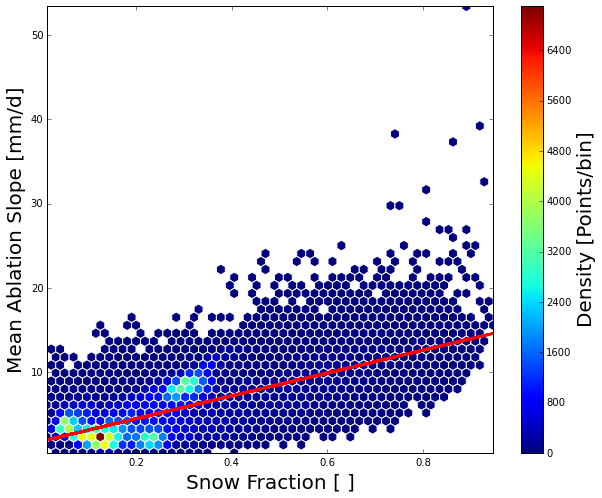

In [6]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
p1 = ax.hexbin(data2.Sf,data2.meanablslope,mincnt=1,gridsize = 50, edgecolors='white')
cb = plt.colorbar(p1)
ax.plot(data2.Sf,results.fittedvalues,'r',lw=2.5)
#ax.set_xlim(-0.1,0.05);
#ax.set_ylim(0,6000);
ax.set_ylabel('Mean Ablation Slope [mm/d]',fontsize = 20)
ax.set_xlabel('Snow Fraction [ ]',fontsize = 20);
cb.set_label('Density [Points/bin]', fontsize = 20)
#plt.savefig('./figures/Sf_vs_ablationrate.png',bbox_inches='tight')

print results.summary()

In [ ]:
np.shape(y)

In [ ]:
data2['cross'] = data2.Sf*data2.meanablslope

In [ ]:
fig = plt.figure(figsize=[10,8])
plt.scatter(data2.Sf,data2.meanablslope,s=30,c=data2.cross, edgecolor='none', alpha=0.05)

In [ ]:
p_value

In [ ]:
np.savetxt('./data/snow_fractions_conus.txt',X)

In [ ]:
np.savetxt('./data/ablation_slope_conus.txt',y)

In [ ]:
np.isnan(y)

In [ ]:
print(list(dat.columns))

In [8]:
dat.head()

PETpenmanvic         P        ET        Sf  \
latitude longitude                                                
25.03125 -100.03125      4.044650  2.380122  1.989825  0.001405   
         -100.09375      3.991995  2.871153  2.254173  0.001652   
         -100.15625      3.802503  2.924025  2.417331  0.002934   
         -100.21875      3.627629  2.321484  2.046060  0.006171   
         -100.28125      3.509792  2.118430  1.900092  0.011271   

                     meanablseason  meandosnowfree  meanpeakswe  meanpeaket  \
latitude longitude                                                            
25.03125 -100.03125       0.285714       14.809524     0.308465    6.680370   
         -100.09375       0.269841       13.000000     0.488219    6.671541   
         -100.15625       1.174603       40.952381     1.307113    6.393477   
         -100.21875       0.539683       21.539683     0.825600    6.152420   
         -100.28125       1.301587       47.968254     2.278933    6.032642   

                     meandopeaket  meanablslope    ...     l2_resid_moisture  \
latitude longitude                                 ...                         
25.03125 -100.03125    243.492063           NaN    ...                   0.1   
         -100.09375    244.015873           NaN    ...                   0.1   
         -100.15625    243.174603           NaN    ...                   0.1   
         -100.21875    241.365079           NaN    ...                   0.1   
         -100.28125    243.619048           NaN    ...                   0.1   

                     elev  snow_rough  l1_Wcr_FRACT  l3_Wcr_FRACT     slope  \
latitude longitude                                                            
25.03125 -100.03125  1177        0.03         0.587         0.523 -0.000573   
         -100.09375  1085        0.03         0.587         0.523  0.000952   
         -100.15625  1804        0.03         0.587         0.523 -0.002408   
         -100.21875  2073        0.03         0.587         0.523  0.003061   
         -100.28125  2473        0.03         0.587         0.523  0.002701   

                     rsquared_adj  intercept  rsquared    pvalue  
latitude longitude                                                
25.03125 -100.03125     -0.120304   0.679592  0.004174  0.859265  
         -100.09375     -0.110454   0.607013  0.028353  0.664974  
         -100.15625     -0.027862   0.654434  0.011671  0.591705  
         -100.21875      0.009498   0.637426  0.085690  0.309798  
         -100.28125      0.043681   0.661026  0.080463  0.151618  

[5 rows x 65 columns]